In [1]:
import pandas as pd
from functions import *

In [2]:
df = pd.read_csv("prescribed_treatment_data.csv", index_col=0)

In [3]:
df.columns

Index(['ex_date', 'incident_name', 'incident_county', 'incident_acres_burned',
       'incident_longitude', 'incident_latitude', 'incident_type',
       '3_months_in_5km', '3_months_size_5km', '3_months_in_10km',
       '3_months_size_10km', '3_months_in_25km', '3_months_size_25km',
       '3_months_in_50km', '3_months_size_50km', '3_months_in_100km',
       '3_months_size_100km', '6_months_in_5km', '6_months_size_5km',
       '6_months_in_10km', '6_months_size_10km', '6_months_in_25km',
       '6_months_size_25km', '6_months_in_50km', '6_months_size_50km',
       '6_months_in_100km', '6_months_size_100km', '12_months_in_5km',
       '12_months_size_5km', '12_months_in_10km', '12_months_size_10km',
       '12_months_in_25km', '12_months_size_25km', '12_months_in_50km',
       '12_months_size_50km', '12_months_in_100km', '12_months_size_100km',
       '24_months_in_5km', '24_months_size_5km', '24_months_in_10km',
       '24_months_size_10km', '24_months_in_25km', '24_months_size_25km',


In [4]:
import pingouin as pg

In [5]:
expected, observed, stats = pg.chi2_independence(df, x='3_months_in_25km',
                                                 y='incident_county')

c:\Users\sequo\anaconda3\envs\thesis\Lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
c:\Users\sequo\anaconda3\envs\thesis\Lib\site-packages\pingouin\contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
c:\Users\sequo\anaconda3\envs\thesis\Lib\site-packages\scipy\stats\_stats_py.py:8073: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
c:\Users\sequo\anaconda3\envs\thesis\Lib\site-packages\scipy\stats\_stats_py.py:8073: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
c:\Users\sequo\anaconda3\envs\thesis\Lib\site-packages\scipy\stats\_stats_py.py:8070: RuntimeWarning: divide by zero encountered in divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


In [6]:
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,270.496938,89.0,3.398736e-20,0.394282,1.0
1,cressie-read,0.666667,272.535142,89.0,1.694545e-20,0.395764,1.0
2,log-likelihood,0.000000,294.965827,89.0,6.881624e-24,0.411729,1.0
3,freeman-tukey,-0.500000,NaN,89.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000000,inf,89.0,0.000000e+00,inf,NaN
5,neyman,-2.000000,NaN,89.0,NaN,NaN,NaN


In [8]:
observed

incident_county,Alameda,Alpine,Amador,"Amador, Calaveras",Butte,"Butte, Plumas, Shasta, Lassen, Tehama",Calaveras,Colusa,"Colusa, Lake, Mendocino","Colusa, Mendocino, Glenn, Lake",...,State of Oregon,Sutter,Tehama,"Tehama, Glenn",Trinity,Tulare,Tuolumne,Ventura,Yolo,Yuba
3_months_in_25km,,,,,,,,,,,,,,,,,,,,,
False,23,3,5,0,35,1,14,4,0,1,...,1,4,42,1,14,28,7,21,8,18
True,6,0,7,1,31,0,11,3,1,0,...,0,0,11,0,3,16,14,1,3,7


In [9]:
expected

incident_county,Alameda,Alpine,Amador,"Amador, Calaveras",Butte,"Butte, Plumas, Shasta, Lassen, Tehama",Calaveras,Colusa,"Colusa, Lake, Mendocino","Colusa, Mendocino, Glenn, Lake",...,State of Oregon,Sutter,Tehama,"Tehama, Glenn",Trinity,Tulare,Tuolumne,Ventura,Yolo,Yuba
3_months_in_25km,,,,,,,,,,,,,,,,,,,,,
False,20.05248,2.074394,8.297578,0.691465,45.636678,0.691465,17.286621,4.840254,0.691465,0.691465,...,0.691465,2.765859,36.647636,0.691465,11.754902,30.424452,14.520761,15.212226,7.606113,17.286621
True,8.94752,0.925606,3.702422,0.308535,20.363322,0.308535,7.713379,2.159746,0.308535,0.308535,...,0.308535,1.234141,16.352364,0.308535,5.245098,13.575548,6.479239,6.787774,3.393887,7.713379


# 3 Months

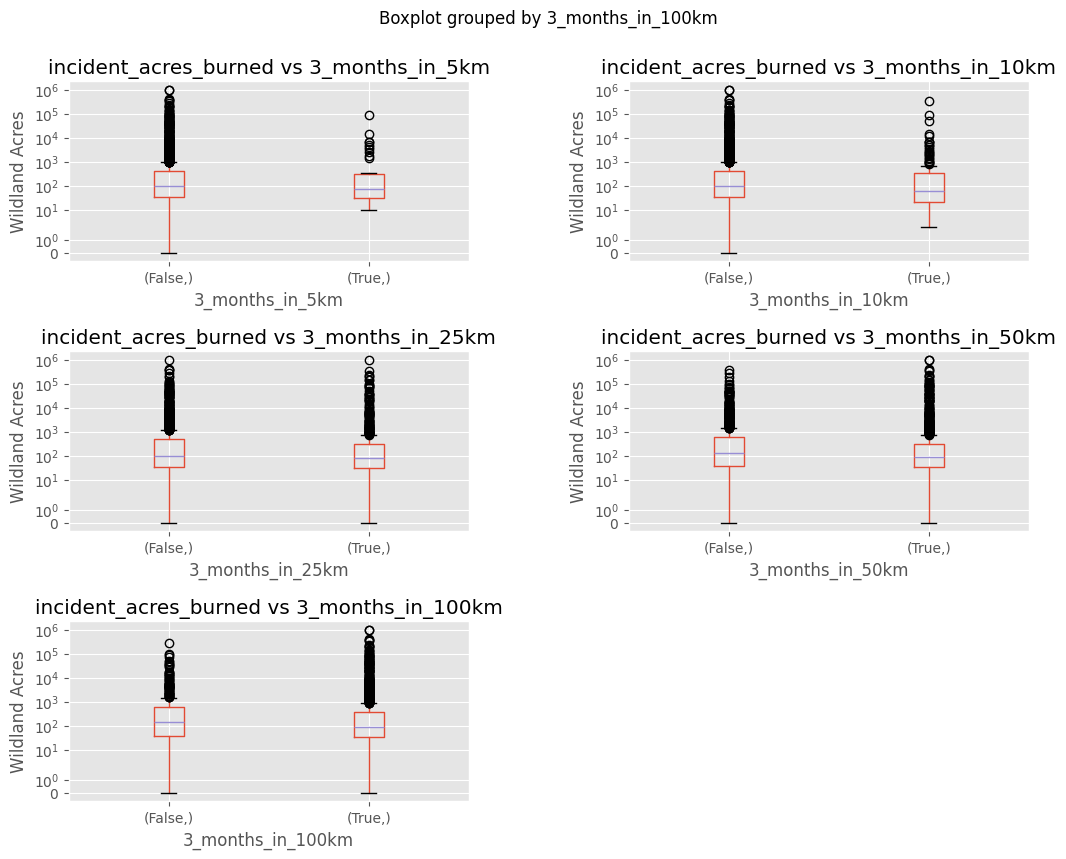

In [4]:
target = "incident_acres_burned"
predictors = ["3_months_in_5km","3_months_in_10km", "3_months_in_25km", "3_months_in_50km", "3_months_in_100km"]
_ = build_boxplots(df, target, predictors= predictors)

In [5]:
mwu, t = run_stats(df, "incident_acres_burned", predictors)
display(mwu)

,,U-val,alternative,p-val,RBC,CLES
3_months_in_5km,MWU,34773.5,two-sided,0.596817,0.046675,0.476663
3_months_in_10km,MWU,89038.5,two-sided,0.010317,0.134713,0.432644
3_months_in_25km,MWU,288042.0,two-sided,0.016372,0.072567,0.463716
3_months_in_50km,MWU,318792.0,two-sided,0.001780,0.088990,0.455505
3_months_in_100km,MWU,200542.0,two-sided,0.044303,0.072855,0.463573


# 6 months

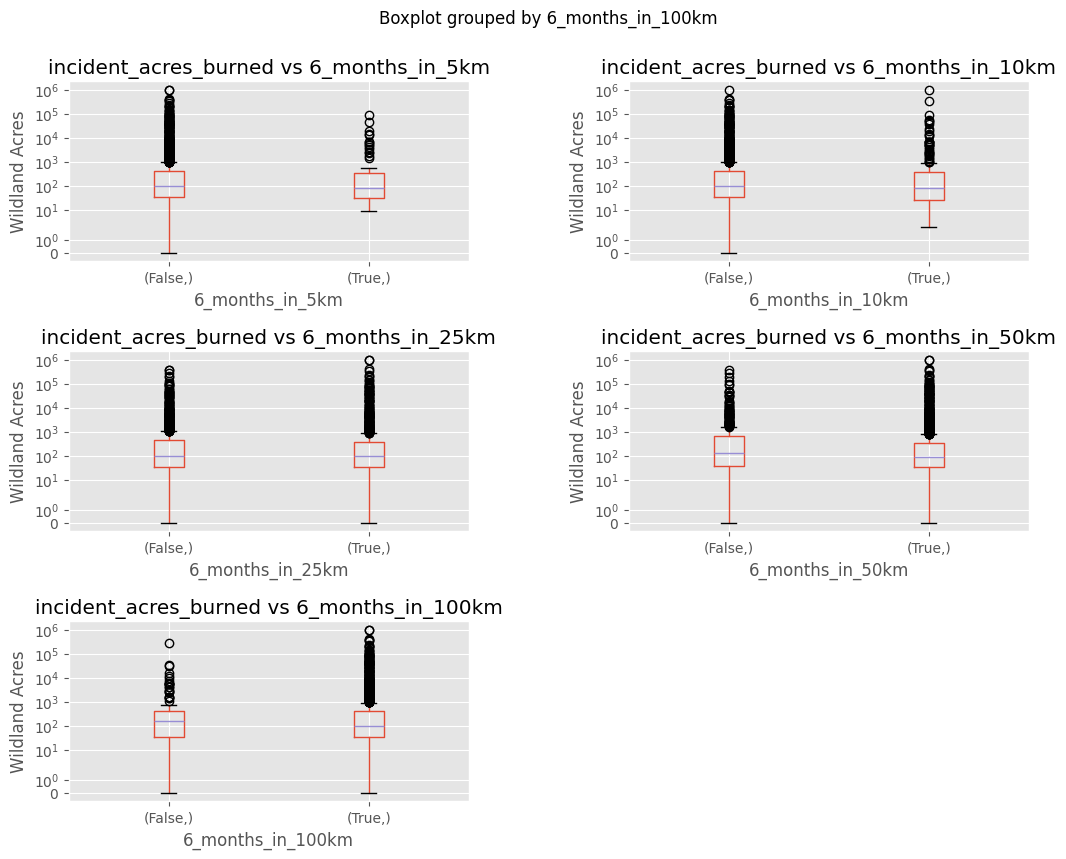

In [6]:
target = "incident_acres_burned"
predictors = ["6_months_in_5km","6_months_in_10km","6_months_in_25km", "6_months_in_50km", "6_months_in_100km"]
_ = build_boxplots(df, target, predictors= predictors)

In [7]:
mwu, t = run_stats(df, "incident_acres_burned", predictors)
display(mwu)

,,U-val,alternative,p-val,RBC,CLES
6_months_in_5km,MWU,53644.5,two-sided,0.930174,0.006363,0.496819
6_months_in_10km,MWU,144932.5,two-sided,0.052046,0.082357,0.458821
6_months_in_25km,MWU,348994.0,two-sided,0.285439,0.030002,0.484999
6_months_in_50km,MWU,238604.0,two-sided,0.008402,0.086858,0.456571
6_months_in_100km,MWU,88006.5,two-sided,0.231858,0.065634,0.467183


# 12 months

In [14]:
df.columns

Index(['ex_date', 'incident_name', 'incident_county', 'incident_acres_burned',
       'incident_longitude', 'incident_latitude', 'incident_type',
       '3_months_in_5km', '3_months_size_5km', '3_months_in_10km',
       '3_months_size_10km', '3_months_in_25km', '3_months_size_25km',
       '3_months_in_50km', '3_months_size_50km', '3_months_in_100km',
       '3_months_size_100km', '6_months_in_5km', '6_months_size_5km',
       '6_months_in_10km', '6_months_size_10km', '6_months_in_25km',
       '6_months_size_25km', '6_months_in_50km', '6_months_size_50km',
       '6_months_in_100km', '6_months_size_100km', '12_months_in_5km',
       '12_months_size_5km', '12_months_in_10km', '12_months_size_10km',
       '12_months_in_25km', '12_months_size_25km', '12_months_in_50km',
       '12_months_size_50km', '12_months_in_100km', '12_months_size_100km',
       '24_months_in_5km', '24_months_size_5km', '24_months_in_10km',
       '24_months_size_10km', '24_months_in_25km', '24_months_size_25km',


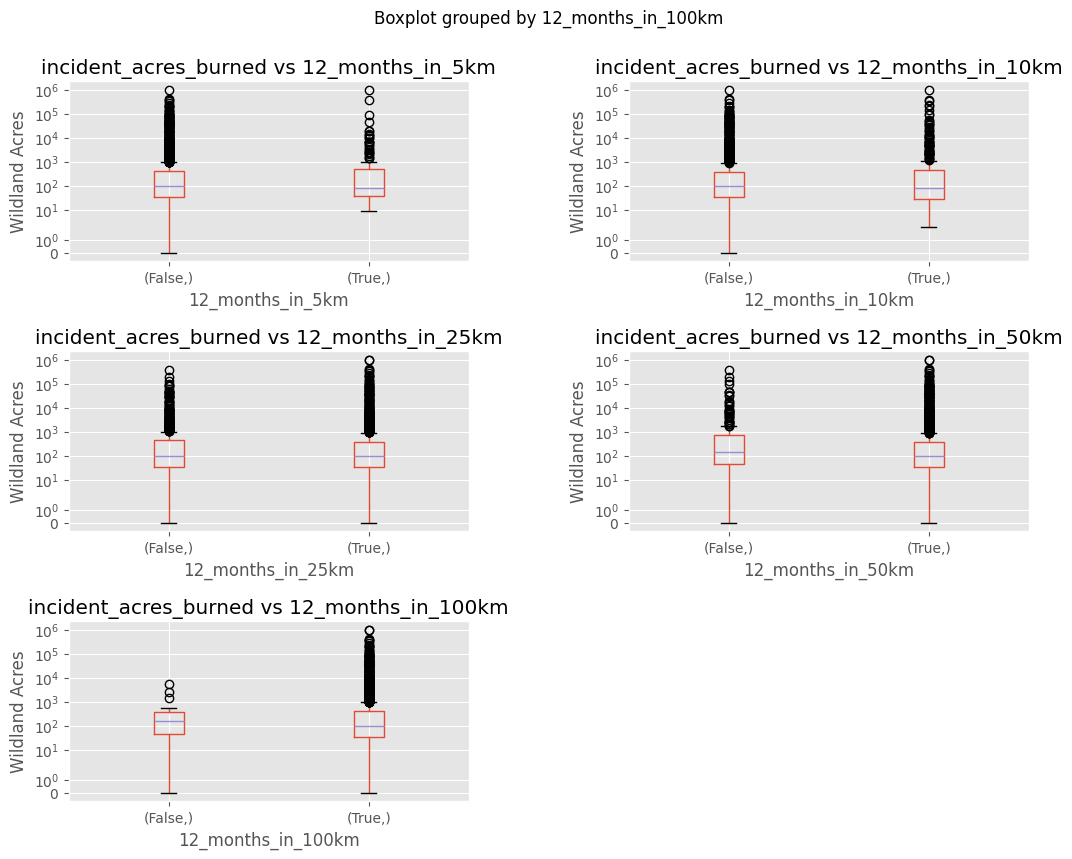

In [8]:
target = "incident_acres_burned"
predictors = ["12_months_in_5km","12_months_in_10km","12_months_in_25km", "12_months_in_50km", "12_months_in_100km"]
_ = build_boxplots(df, target, predictors= predictors)

In [9]:
mwu, t = run_stats(df, "incident_acres_burned", predictors)
display(mwu)

,,U-val,alternative,p-val,RBC,CLES
12_months_in_5km,MWU,102392.5,two-sided,0.655144,-0.023797,0.511899
12_months_in_10km,MWU,217701.5,two-sided,0.181701,0.047075,0.476463
12_months_in_25km,MWU,337445.0,two-sided,0.266848,0.031688,0.484156
12_months_in_50km,MWU,132166.0,two-sided,0.007629,0.116233,0.441883
12_months_in_100km,MWU,13965.5,two-sided,0.859648,0.024926,0.487537


# 24 months

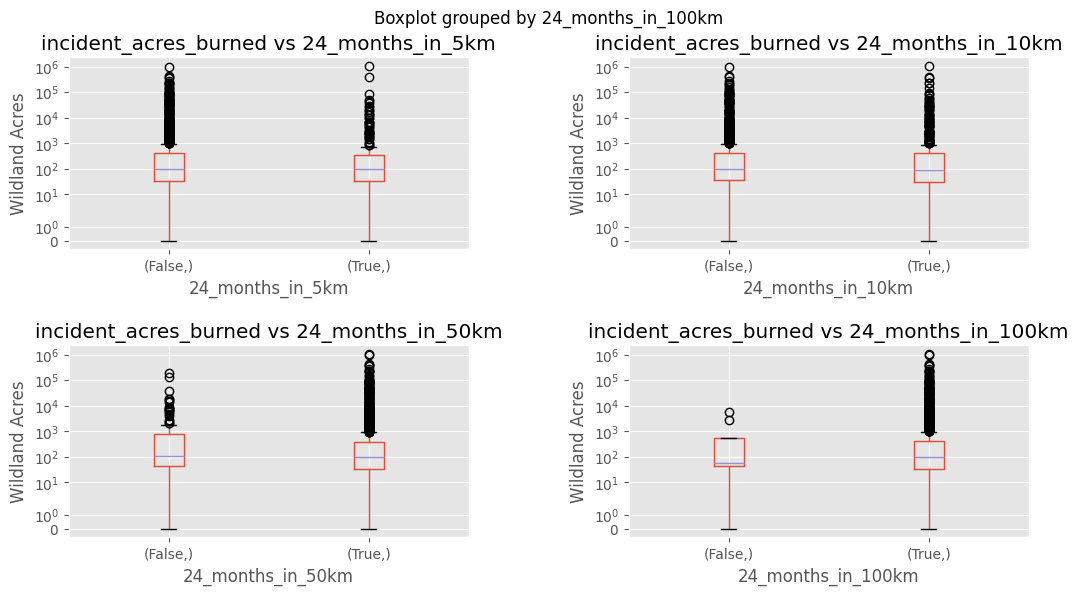

In [17]:
target = "incident_acres_burned"
predictors = ["24_months_in_5km","24_months_in_10km","24_months_in_50km", "24_months_in_100km"]
_ = build_boxplots(df, target, predictors= predictors)

In [18]:
mwu, t = run_stats(df, "incident_acres_burned", predictors)
display(mwu)

,,U-val,alternative,p-val,RBC,CLES
24_months_in_5km,MWU,143912.5,two-sided,0.883493,-0.006532,0.503266
24_months_in_10km,MWU,278594.5,two-sided,0.197962,0.040256,0.479872
24_months_in_50km,MWU,86676.0,two-sided,0.112230,0.086852,0.456574
24_months_in_100km,MWU,7500.0,two-sided,0.936040,0.015554,0.492223


# 36 Months

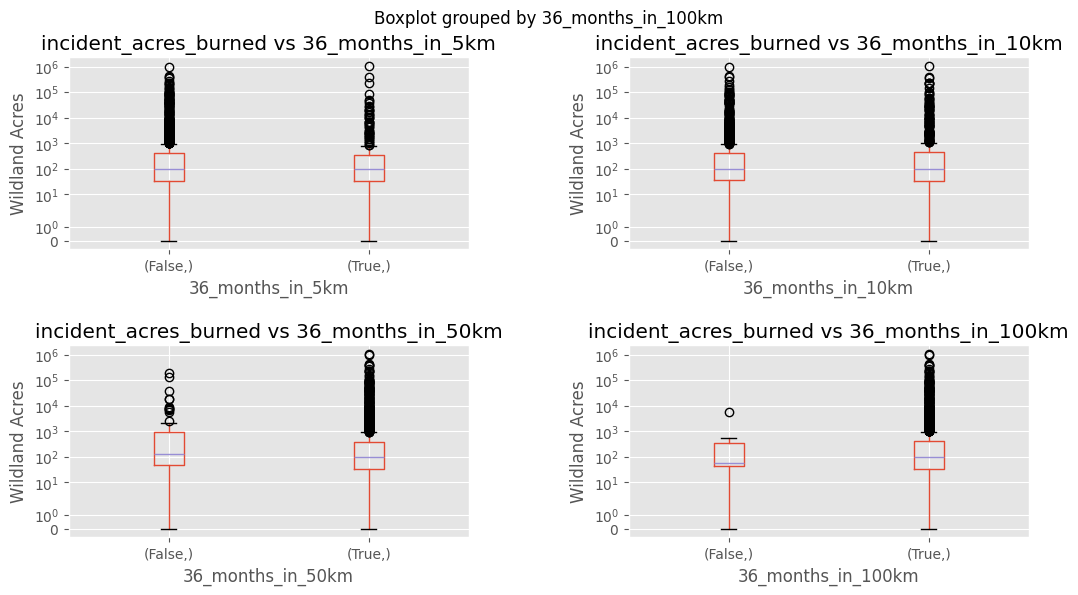

In [19]:
target = "incident_acres_burned"
predictors = ["36_months_in_5km","36_months_in_10km","36_months_in_50km", "36_months_in_100km"]
_ = build_boxplots(df, target, predictors= predictors)

In [20]:
mwu, t = run_stats(df, "incident_acres_burned", predictors)
display(mwu)

,,U-val,alternative,p-val,RBC,CLES
36_months_in_5km,MWU,160591.0,two-sided,0.912752,-0.004620,0.502310
36_months_in_10km,MWU,314900.5,two-sided,0.610009,0.015197,0.492401
36_months_in_50km,MWU,56632.5,two-sided,0.079680,0.116615,0.441693
36_months_in_100km,MWU,7327.0,two-sided,0.691390,-0.081316,0.540658
